# 实战-电影统计

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB
None
              Rank         Year  Runtime (Minutes)       Rating         Votes  \
count  1000.000000  1000.000000        1000.000000  1000.00

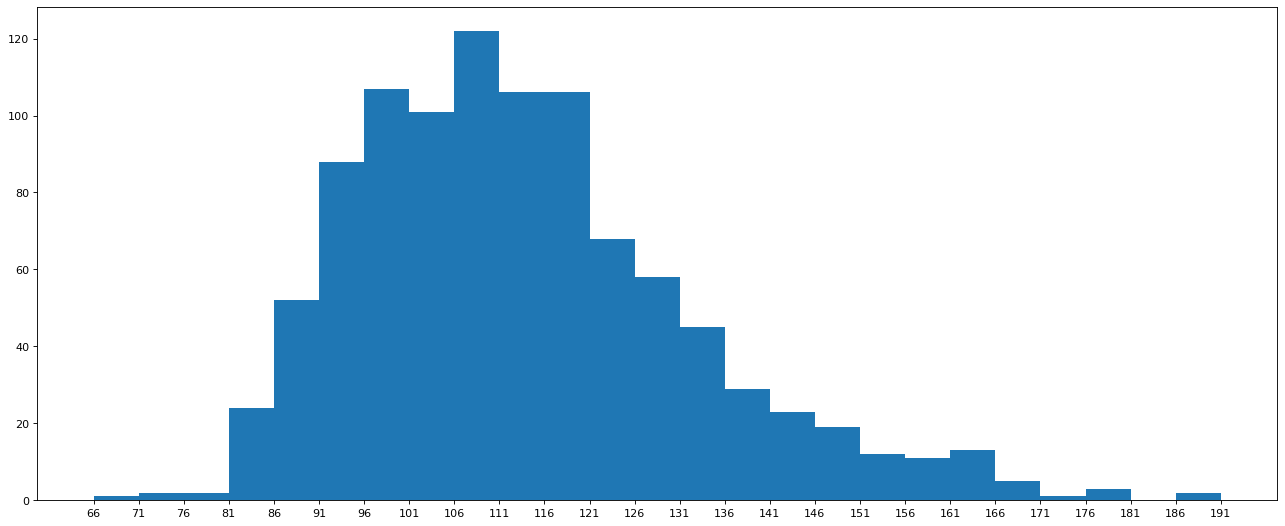

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

file_path = "IMDB-Movie-Data.csv"
df = pd.read_csv(file_path) #不加路径默认当前路径
# 打印数据信息
print(df.info())
print(df.describe())
# print(df.head(1))

# # 获取平均评分
# print(df["Rating"].mean())
print('-'*50)
# 导演的人数
print(len(set(df["Director"].tolist())))
print(len(df["Director"].unique()))

# # 获取演员的人数
temp_actors_list = df["Actors"].str.split(", ").tolist()  #二维列表
# print(temp_actors_list)
actors_list = [i for j in temp_actors_list for i in j]  #二维展为一维
actors_num = len(set(actors_list))
print(actors_num)

# rating,runtime分布情况
# 选择图形，直方图
# 准备数据
runtime_data = df["Runtime (Minutes)"].values

max_runtime = runtime_data.max()
min_runtime = runtime_data.min()

# 计算组数
print(max_runtime - min_runtime)
print('-'*50)
num_bin = (max_runtime - min_runtime) // 5

# 设置图形的大小
plt.figure(figsize=(20, 8), dpi=80)
# 第二个bins参数必须为int或sequence或str，bins代表划分为多少个单元
plt.hist(runtime_data, int(num_bin))

plt.xticks(range(min_runtime, max_runtime + 5, 5))

plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB
None
   Rank                    Title                    Genre  \
0     1  Guardians of the Galaxy  Action,Adventure,Sci-Fi   

                 

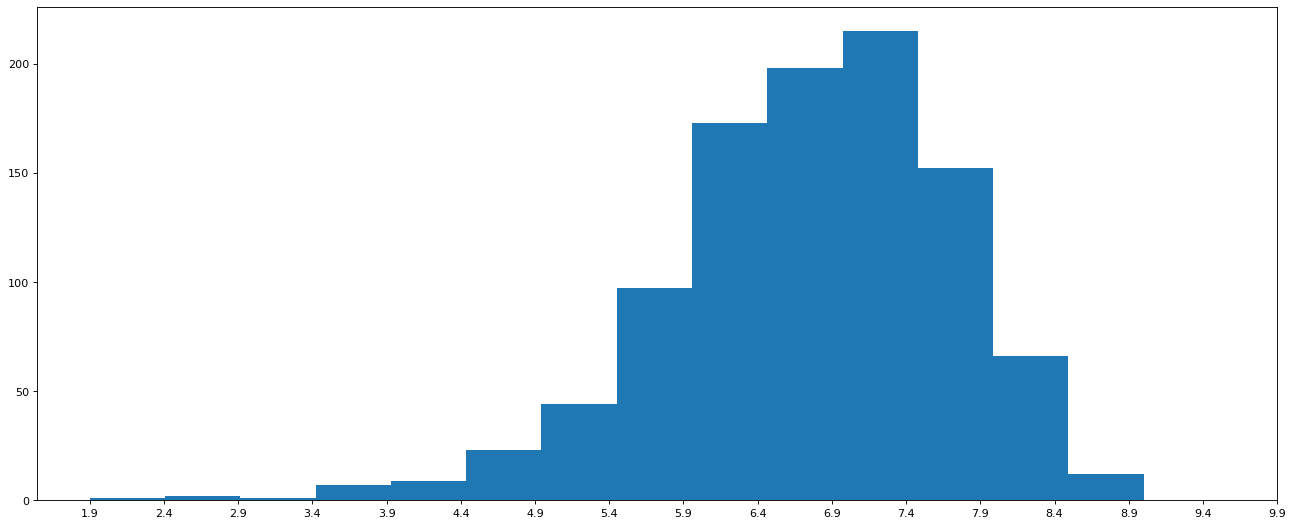

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

file_path = "IMDB-Movie-Data.csv"
df = pd.read_csv(file_path)
# 打印数据信息
print(df.info())

print(df.head(1))

# 获取平均评分
print(df["Rating"].mean())

# 导演的人数
print(len(set(df["Director"].tolist())))
print(len(df["Director"].unique()))

# 获取演员的人数
temp_actors_list = df["Actors"].str.split(", ").tolist()
actors_list = [i for j in temp_actors_list for i in j]
actors_num = len(set(actors_list))
print(actors_num)

# rating,runtime分布情况
# 选择图形，直方图
# 准备数据
runtime_data = df["Rating"].values

max_runtime = runtime_data.max()
min_runtime = runtime_data.min()
print('-'*50)
print(max_runtime,min_runtime)
# 计算组数
print(max_runtime - min_runtime)
num_bin = (max_runtime - min_runtime) // 0.5

# 设置图形的大小
plt.figure(figsize=(20, 8), dpi=80)
# 第二个bins参数必须为int或sequence或str，bins代表划分为多少个单元
plt.hist(runtime_data, int(num_bin))

#因为range的步长不支持0.5
_x = [min_runtime]
i = min_runtime
while i <= max_runtime + 0.5:
    i = i + 0.5
    _x.append(i)

plt.xticks(_x)

plt.show()

0     Action,Adventure,Sci-Fi
1    Adventure,Mystery,Sci-Fi
2             Horror,Thriller
Name: Genre, dtype: object
20
     Romance  Biography  Fantasy  Comedy  Adventure  Musical  Western  Sci-Fi  \
0        0.0        0.0      0.0     0.0        0.0      0.0      0.0     0.0   
1        0.0        0.0      0.0     0.0        0.0      0.0      0.0     0.0   
2        0.0        0.0      0.0     0.0        0.0      0.0      0.0     0.0   
3        0.0        0.0      0.0     0.0        0.0      0.0      0.0     0.0   
4        0.0        0.0      0.0     0.0        0.0      0.0      0.0     0.0   
..       ...        ...      ...     ...        ...      ...      ...     ...   
995      0.0        0.0      0.0     0.0        0.0      0.0      0.0     0.0   
996      0.0        0.0      0.0     0.0        0.0      0.0      0.0     0.0   
997      0.0        0.0      0.0     0.0        0.0      0.0      0.0     0.0   
998      0.0        0.0      0.0     0.0        0.0      0.0      0.0 

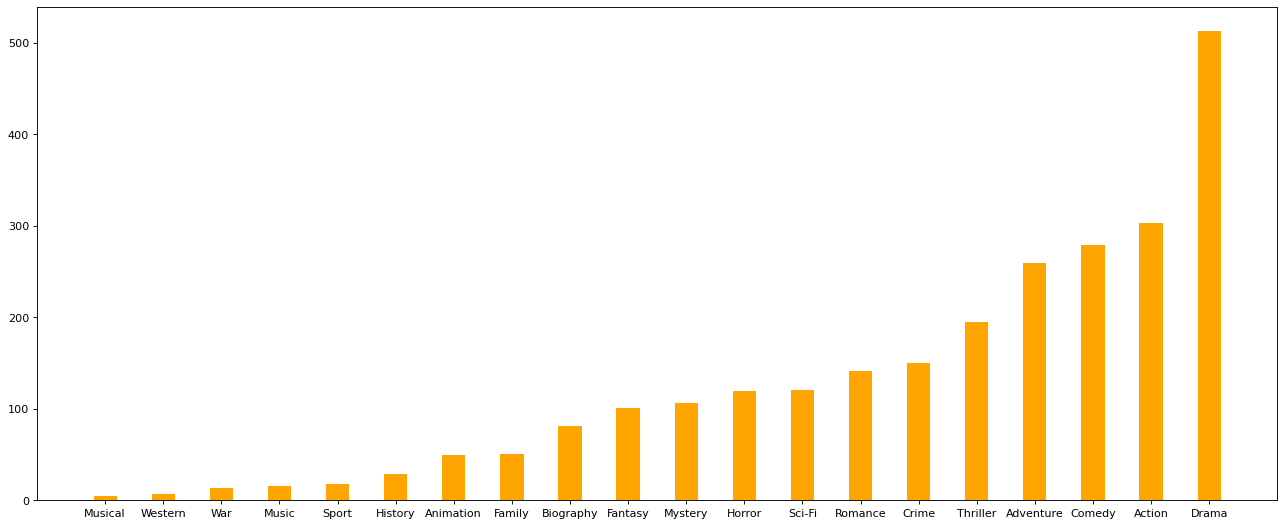

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
#导演要拍什么题材电影
file_path = "./IMDB-Movie-Data.csv"

df = pd.read_csv(file_path)
print(df["Genre"].head(3))  #看前几条数据，掌握格式，内容类型
# 统计分类的列表
temp_list = df["Genre"].str.split(",").tolist()  # [[],[],[]]
# 二维变为1位
genre_list = list(set([i for j in temp_list for i in j]))
print(len(genre_list))
# 构造全为0的数组，行是原来的样本数，列是题材类型数目，one-hot编码
zeros_df = pd.DataFrame(np.zeros((df.shape[0], len(genre_list))), columns=genre_list)
print(zeros_df)

# 给每个电影出现分类的位置赋值1
for i in range(df.shape[0]):
    # zeros_df.loc[0,["Sci-fi","Mucical"]] = 1
    zeros_df.loc[i, temp_list[i]] = 1

print(zeros_df.head(3))

# 统计每个分类的电影的数量和，genre_count是什么类型？
genre_count = zeros_df.sum(axis=0)
print(genre_count)

# 排序
genre_count = genre_count.sort_values()
_x = genre_count.index
_y = genre_count.values
# 画图
plt.figure(figsize=(20, 8), dpi=80)
plt.bar(range(len(_x)), _y, width=0.4, color="orange")
plt.xticks(range(len(_x)), _x)
plt.show()

# Pandas分组与聚合

分组 (groupby)
- 对数据集进行分组，然后对每组进行统计分析
- SQL 能够对数据进行过滤，分组聚合
- pandas 能利用 groupby 进行更加复杂的分组运算
- 分组运算过程：split->apply->combine
    - 拆分：进行分组的根据
    - 应用：每个分组运行的计算规则
    - 合并：把每个分组的计算结果合并起来


In [5]:
import pandas as pd
import numpy as np
dict_obj = {'key1' : ['a', 'b', 'a', 'b', 
                      'a', 'b', 'a', 'a'],
            'key2' : ['one', 'one', 'two', 'three',
                      'two', 'two', 'one', 'three'],
            'data1': np.random.randn(8),
            'data2': np.random.randn(8)}
df_obj = pd.DataFrame(dict_obj)

print(df_obj)

# dataframe根据key1进行分组，分组后的对象类型
print(df_obj.groupby('key1'))
print(type(df_obj.groupby('key1')))
print('-'*50)
print(df_obj['data1'])
# dataframe的 data1 列根据 key1 进行分组
print(type(df_obj['data1'].groupby(df_obj['key1'])))

# 分组运算
grouped1 = df_obj.groupby('key1')
print(grouped1.mean())

grouped2 = df_obj['data1'].groupby(df_obj['key1'])
print(grouped2.mean())


  key1   key2     data1     data2
0    a    one -1.957315 -3.106336
1    b    one -0.271301 -0.487812
2    a    two -1.099841 -0.746187
3    b  three  2.254651  0.425182
4    a    two -0.383817 -0.772440
5    b    two -0.322823  1.624969
6    a    one -0.391426  1.496168
7    a  three  1.624395 -0.108033
<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
--------------------------------------------------
0   -1.957315
1   -0.271301
2   -1.099841
3    2.254651
4   -0.383817
5   -0.322823
6   -0.391426
7    1.624395
Name: data1, dtype: float64
<class 'pandas.core.groupby.generic.SeriesGroupBy'>
         data1     data2
key1                    
a    -0.441601 -0.647366
b     0.553509  0.520779
key1
a   -0.441601
b    0.553509
Name: data1, dtype: float64


/tmp/ipykernel_9509/3874294076.py:23: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(grouped1.mean())


### 3. 按自定义的key分组

In [6]:
# # 按自定义key分组，列表
self_def_key = [0, 1, 2, 3, 3, 3, 5, 7]
print(df_obj.groupby(self_def_key).size())  #等于mysql的count
print(df_obj.groupby(self_def_key).sum()) 
# 按自定义key分组，多层列表
print(df_obj.groupby([df_obj['key1'], df_obj['key2']]).size())

# # 按多个列多层分组
print('-'*50)
grouped2 = df_obj.groupby(['key1', 'key2'])
print(grouped2.size())

# # 多层分组按key的顺序进行
print('-'*50)
grouped3 = df_obj.groupby(['key2', 'key1'])
print(grouped3.size())
print(grouped3.mean())
# unstack可以将多层索引的结果转换成单层的dataframe
print(grouped3.mean().index)
print(grouped3.mean().unstack())  #竖变横
print(grouped3.mean().unstack().columns)
# # 多层分组，根据key1 和 key2，做个性化处理
for group_name, group_data in grouped3:
    print(group_name)
    print(group_data)
    print(type(group_data))

0    1
1    1
2    1
3    3
5    1
7    1
dtype: int64
      data1     data2
0 -1.957315 -3.106336
1 -0.271301 -0.487812
2 -1.099841 -0.746187
3  1.548011  1.277710
5 -0.391426  1.496168
7  1.624395 -0.108033
key1  key2 
a     one      2
      three    1
      two      2
b     one      1
      three    1
      two      1
dtype: int64
--------------------------------------------------
key1  key2 
a     one      2
      three    1
      two      2
b     one      1
      three    1
      two      1
dtype: int64
--------------------------------------------------
key2   key1
one    a       2
       b       1
three  a       1
       b       1
two    a       2
       b       1
dtype: int64
               data1     data2
key2  key1                    
one   a    -1.174371 -0.805084
      b    -0.271301 -0.487812
three a     1.624395 -0.108033
      b     2.254651  0.425182
two   a    -0.741829 -0.759314
      b    -0.322823  1.624969
MultiIndex([(  'one', 'a'),
            (  'one', 'b'),
    

/tmp/ipykernel_9509/4169555547.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df_obj.groupby(self_def_key).sum())


In [7]:
list(grouped3)

[(('one', 'a'),
    key1 key2     data1     data2
  0    a  one -1.957315 -3.106336
  6    a  one -0.391426  1.496168),
 (('one', 'b'),
    key1 key2     data1     data2
  1    b  one -0.271301 -0.487812),
 (('three', 'a'),
    key1   key2     data1     data2
  7    a  three  1.624395 -0.108033),
 (('three', 'b'),
    key1   key2     data1     data2
  3    b  three  2.254651  0.425182),
 (('two', 'a'),
    key1 key2     data1     data2
  2    a  two -1.099841 -0.746187
  4    a  two -0.383817 -0.772440),
 (('two', 'b'),
    key1 key2     data1     data2
  5    b  two -0.322823  1.624969)]

# 按类型分组

In [8]:
print(df_obj.dtypes)

key1      object
key2      object
data1    float64
data2    float64
dtype: object


In [9]:
#一列数据类型必须一致，因为现实生活中一个特征类型是一致的
df_obj['data3']=df_obj['data2']+1
print(df_obj)
print(df_obj.groupby(df_obj.dtypes, axis=1).size())#按轴0没有意义
print(df_obj.groupby(df_obj.dtypes, axis=1).sum()) 
self_column_key=[1,2,3,3,4]
print(df_obj.groupby(self_column_key, axis=1).sum())   #通过自定义索引去让不同列相加

  key1   key2     data1     data2     data3
0    a    one -1.957315 -3.106336 -2.106336
1    b    one -0.271301 -0.487812  0.512188
2    a    two -1.099841 -0.746187  0.253813
3    b  three  2.254651  0.425182  1.425182
4    a    two -0.383817 -0.772440  0.227560
5    b    two -0.322823  1.624969  2.624969
6    a    one -0.391426  1.496168  2.496168
7    a  three  1.624395 -0.108033  0.891967
float64    3
object     2
dtype: int64
    float64  object
0 -7.169987    aone
1 -0.246925    bone
2 -1.592215    atwo
3  4.105015  bthree
4 -0.928697    atwo
5  3.927114    btwo
6  3.600911    aone
7  2.408329  athree
   1      2         3         4
0  a    one -5.063651 -2.106336
1  b    one -0.759113  0.512188
2  a    two -1.846028  0.253813
3  b  three  2.679833  1.425182
4  a    two -1.156257  0.227560
5  b    two  1.302146  2.624969
6  a    one  1.104742  2.496168
7  a  three  1.516362  0.891967


### 2. 通过字典分组

In [10]:
df_obj2 = pd.DataFrame(np.random.randint(1, 10, (5,5)),
                       columns=['a', 'b', 'c', 'd', 'e'],
                       index=['A', 'B', 'C', 'D', 'E'])
# 给指定某个部分的数据重新赋值为 np.NaN
df_obj2.loc['B','b':'d']=np.NAN

print(df_obj2)
# 通过字典分组
mapping_dict = {'a':'Python', 'b':'Python', 'c':'Java', 'd':'C', 'e':'Java'}
print(df_obj2.groupby(mapping_dict, axis=1).size())
print(df_obj2.groupby(mapping_dict, axis=1).count()) # 非NaN的个数
print(df_obj2.groupby(mapping_dict, axis=1).sum())  #求和不记录nan,nan当为0


   a    b    c    d  e
A  9  1.0  6.0  2.0  1
B  2  NaN  NaN  NaN  9
C  4  3.0  9.0  6.0  2
D  7  7.0  9.0  2.0  8
E  9  2.0  4.0  4.0  1
C         1
Java      2
Python    2
dtype: int64
   C  Java  Python
A  1     2       2
B  0     1       1
C  1     2       2
D  1     2       2
E  1     2       2
     C  Java  Python
A  2.0   7.0    10.0
B  0.0   9.0     2.0
C  6.0  11.0     7.0
D  2.0  17.0    14.0
E  4.0   5.0    11.0


In [11]:
str1='熊大'

In [12]:
str1[0]

'熊'

In [13]:
# 通过函数分组
df_obj3 = pd.DataFrame(np.random.randint(1, 10, (5,5)),
                       columns=['a', 'b', 'c', 'd', 'ee'],
                       index=['AA', 'BBBB', 'CC', 'D', 'EE'])
#df_obj3

def group_key(idx):
    """
        idx 为列索引或行索引，默认为行索引
    """
    #return idx
    return len(idx)
print(df_obj3)
print(df_obj3.groupby(group_key,axis=1).size())

# 以上自定义函数等价于
df_obj3.groupby(len).size()


      a  b  c  d  ee
AA    6  8  8  5   5
BBBB  3  3  1  6   4
CC    5  8  8  9   2
D     6  5  2  4   9
EE    7  1  2  4   6
1    4
2    1
dtype: int64


1    1
2    3
4    1
dtype: int64

In [14]:
# 通过索引级别分组
columns = pd.MultiIndex.from_arrays([['Python', 'Java', 'Python', 'Java', 'Python'],
                                     ['A', 'A', 'B', 'C', 'B']], 
                                    names=['language', 'index1'])
df_obj4 = pd.DataFrame(np.random.randint(1, 10, (5, 5)), columns=columns)
print(df_obj4)

# 根据language进行分组
print(df_obj4.groupby(level='language', axis=1).sum())
# 根据index进行分组
print(df_obj4.groupby(level='index1', axis=1).sum())


language Python Java Python Java Python
index1        A    A      B    C      B
0             5    3      6    7      3
1             5    3      4    6      3
2             6    9      3    2      2
3             6    1      9    9      5
4             7    9      7    2      1
language  Java  Python
0           10      14
1            9      12
2           11      11
3           10      20
4           11      15
index1   A   B  C
0        8   9  7
1        8   7  6
2       15   5  2
3        7  14  9
4       16   8  2


## 聚合


In [15]:
dict_obj = {'key1' : ['a', 'b', 'a', 'b', 
                      'a', 'b', 'a', 'a'],
            'key2' : ['one', 'one', 'two', 'three',
                      'two', 'two', 'one', 'three'],
            'data1': np.random.randint(1,10, 8),
            'data2': np.random.randint(1,10, 8)}
print(df_obj.groupby("key1").sum())
print(df_obj.groupby("key1").max())
print(df_obj.groupby("key1").min())
print('-'*50)
#平均值
print(df_obj.groupby("key1").mean())
print('-'*50)
print(df_obj.groupby("key1").describe())

         data1     data2     data3
key1                              
a    -2.208004 -3.236828  1.763172
b     1.660528  1.562338  4.562338
     key2     data1     data2     data3
key1                                   
a     two  1.624395  1.496168  2.496168
b     two  2.254651  1.624969  2.624969
     key2     data1     data2     data3
key1                                   
a     one -1.957315 -3.106336 -2.106336
b     one -0.322823 -0.487812  0.512188
--------------------------------------------------
         data1     data2     data3
key1                              
a    -0.441601 -0.647366  0.352634
b     0.553509  0.520779  1.520779
--------------------------------------------------
     data1                                                              \
     count      mean       std       min       25%       50%       75%   
key1                                                                     
a      5.0 -0.441601  1.323335 -1.957315 -1.099841 -0.391426 -0.383817   
b 

/tmp/ipykernel_9509/2916846254.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df_obj.groupby("key1").sum())
/tmp/ipykernel_9509/2916846254.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df_obj.groupby("key1").mean())


In [16]:

df_obj5 = pd.DataFrame(dict_obj)
print(df_obj5)
# 自定义聚合函数
def peak_range(df):
    """
        返回数值范围,df参数是groupby后的groupby对象
    """
    #print type(df) #参数为索引所对应的记录
    return df.max() - df.min()

print(df_obj5.loc[:,['key1','data1','data2']].groupby('key1').agg(peak_range))
print(df_obj5.groupby('key1').agg(lambda df : df.max() - df.min()))

  key1   key2  data1  data2
0    a    one      3      3
1    b    one      7      2
2    a    two      6      2
3    b  three      9      1
4    a    two      3      2
5    b    two      6      1
6    a    one      6      7
7    a  three      4      3
      data1  data2
key1              
a         3      5
b         3      1
      data1  data2
key1              
a         3      5
b         3      1


/tmp/ipykernel_9509/788959218.py:12: FutureWarning: ['key2'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  print(df_obj5.groupby('key1').agg(lambda df : df.max() - df.min()))


In [17]:
# 同时应用多个聚合函数
print(df_obj.groupby('key1').agg(['mean', 'std', 'count', peak_range]))

         data1                                data2                            \
          mean       std count peak_range      mean      std count peak_range   
key1                                                                            
a    -0.441601  1.323335     5   3.581710 -0.647366  1.65511     5   4.602504   
b     0.553509  1.473457     3   2.577474  0.520779  1.05963     3   2.112781   

         data3                            
          mean      std count peak_range  
key1                                      
a     0.352634  1.65511     5   4.602504  
b     1.520779  1.05963     3   2.112781  


/tmp/ipykernel_9509/2941151041.py:2: FutureWarning: ['key2'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  print(df_obj.groupby('key1').agg(['mean', 'std', 'count', peak_range]))


In [18]:
# 每列作用不同的聚合函数
dict_mapping = {'data1':'mean',
                'data2':'count'}
print(df_obj.groupby('key1').agg(dict_mapping))


         data1  data2
key1                 
a    -0.441601      5
b     0.553509      3


# 星巴克全球开店

In [19]:
import pandas as pd
import numpy as np

file_path = "./starbucks_store_worldwide.csv"

df = pd.read_csv(file_path)
print(df.head(1))
print(df.info())  #数据总体有一个把控
grouped=df.groupby(by='Country')
grouped.size()

       Brand  Store Number     Store Name Ownership Type     Street Address  \
0  Starbucks  47370-257954  Meritxell, 96       Licensed  Av. Meritxell, 96   

               City State/Province Country Postcode Phone Number  \
0  Andorra la Vella              7      AD    AD500    376818720   

                  Timezone  Longitude  Latitude  
0  GMT+1:00 Europe/Andorra       1.53     42.51  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25600 entries, 0 to 25599
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           25600 non-null  object 
 1   Store Number    25600 non-null  object 
 2   Store Name      25600 non-null  object 
 3   Ownership Type  25600 non-null  object 
 4   Street Address  25598 non-null  object 
 5   City            25585 non-null  object 
 6   State/Province  25600 non-null  object 
 7   Country         25600 non-null  object 
 8   Postcode        24078 non-null  object 


Country
AD        1
AE      144
AR      108
AT       18
AU       22
      ...  
TT        3
TW      394
US    13608
VN       25
ZA        3
Length: 73, dtype: int64

In [20]:
#任取一列求count，也可以用country列自身
country_count = grouped["Brand"].count()
print(country_count["US"])
print(country_count["CN"])

13608
2734


<BarContainer object of 31 artists>

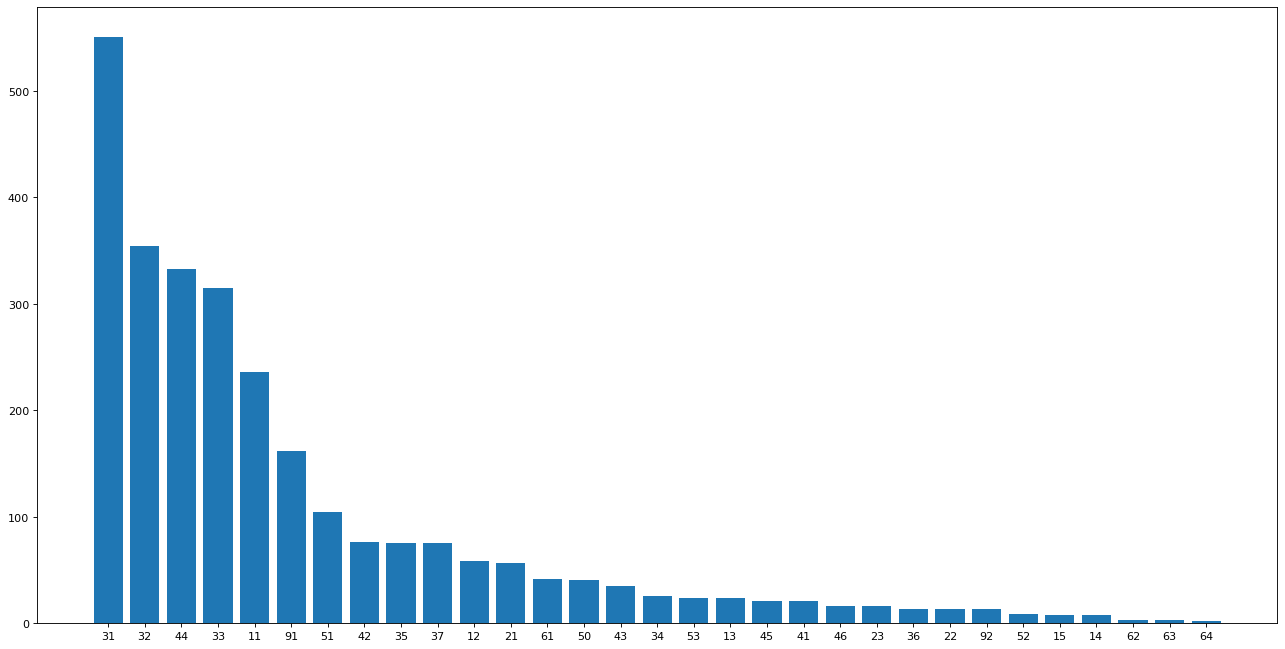

In [21]:
#中国不同省份的星巴克数量，图像绘制
import matplotlib.pyplot as plt
country_cn=df[df['Country']=='CN']
china_province=country_cn.groupby(by="State/Province").count()['Brand'].sort_values(ascending=False)
plt.figure(figsize=(20,10),dpi=80)
plt.bar(china_province.index,china_province.values)

In [22]:
china_province.index

Index(['31', '32', '44', '33', '11', '91', '51', '42', '35', '37', '12', '21',
       '61', '50', '43', '34', '53', '13', '45', '41', '46', '23', '36', '22',
       '92', '52', '15', '14', '62', '63', '64'],
      dtype='object', name='State/Province')

In [23]:
grouped1 = df[["Brand"]].groupby(by=[df["Country"], df["State/Province"]]).count()
grouped1

Brand
Country State/Province       
AD      7                   1
AE      AJ                  2
        AZ                 48
        DU                 82
        FU                  2
...                       ...
US      WV                 25
        WY                 23
VN      HN                  6
        SG                 19
ZA      GT                  3

[545 rows x 1 columns]

In [24]:
grouped2 = df.groupby(by=[df["Country"], df["State/Province"]]).count()
grouped2

Brand  Store Number  Store Name  Ownership Type  \
Country State/Province                                                    
AD      7                   1             1           1               1   
AE      AJ                  2             2           2               2   
        AZ                 48            48          48              48   
        DU                 82            82          82              82   
        FU                  2             2           2               2   
...                       ...           ...         ...             ...   
US      WV                 25            25          25              25   
        WY                 23            23          23              23   
VN      HN                  6             6           6               6   
        SG                 19            19          19              19   
ZA      GT                  3             3           3               3   

                        Street Address  City  Postcode  Phone Number  \
Country State/Province                                                 
AD      7                            1     1         1             1   
AE      AJ                           2     2         0             0   
        AZ                          48    48         7            20   
        DU                          82    82        16            50   
        FU                           2     2         1             0   
...                                ...   ...       ...           ...   
US      WV                          25    25        25            23   
        WY                          23    23        23            22   
VN      HN                           6     6         6             6   
        SG                          19    19        19            17   
ZA      GT                           3     3         3             2   

                        Timezone  Longitude  Latitude  
Country State/Province                                 
AD      7                      1          1         1  
AE      AJ                     2          2         2  
        AZ                    48         48        48  
        DU                    82         82        82  
        FU                     2          2         2  
...                          ...        ...       ...  
US      WV                    25         25        25  
        WY                    23         23        23  
VN      HN                     6          6         6  
        SG                    19         19        19  
ZA      GT                     3          3         3  

[545 rows x 11 columns]

In [25]:
country_cn[country_cn['State/Province']=='32']

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
3062,Starbucks,48862-265746,Changshu Fangta Street-GF,Joint Venture,Fangta Street and HeDong Street,Changshu,32,CN,215500,NaN,GMT+08:00 Asia/Beijing,120.75,31.64
3063,Starbucks,48238-258108,CZ Wujin Kaia Lomo Plaza Store-GF,Joint Venture,"Huayuan St & Yongsheng Road, Wujin District",Changzhou,32,CN,213000,NaN,GMT+08:00 Asia/Beijing,119.95,31.69
3064,Starbucks,26608-244608,Nanjing Sun Palace Store-GF,Joint Venture,"No.3 yangguang Rd, Xuanwu",Nanjing,32,CN,210000,NaN,GMT+08:00 Asia/Beijing,118.81,32.06
3065,Starbucks,48586-263487,NT Haimen Zhongnan Plaza Store-GF,Joint Venture,"Zhangjian Avenue&Nanhai Road, Haimen City",Nantong,32,CN,226000,NaN,GMT+08:00 Asia/Beijing,121.17,31.88
3066,Starbucks,49404-268987,NT Rudong wenfeng Dept Store-GF,Joint Venture,"No.19 North Qingyuan Rd, Rudong",Nantong,32,CN,226000,NaN,GMT+08:00 Asia/Beijing,121.18,32.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3411,Starbucks,24743-238567,镇江丹阳吾悦广场店,Joint Venture,"丹阳市开发区, 新民东路99号10#-102铺位",镇江市,32,CN,NaN,NaN,GMT+08:00 Asia/Beijing,119.61,32.00
3412,Starbucks,24065-234944,丹阳金鹰天地店,Joint Venture,"丹阳市, 金鹰天地广场",镇江市,32,CN,212300,NaN,GMT+08:00 Asia/Beijing,119.58,31.99
3413,Starbucks,24740-238713,泰州靖江泰和国际城店,Joint Venture,车站路77号泰和国际城C1-01铺位,靖江市,32,CN,214500,NaN,GMT+08:00 Asia/Beijing,120.26,32.01
3414,Starbucks,24336-236945,泰州靖江文峰大世界店,Joint Venture,"人民北路1号文峰大世界1层1-2单元, 通湖路333号",靖江市,32,CN,214500,NaN,GMT+08:00 Asia/Beijing,120.27,32.02


# 设置索引

In [26]:
#索引中单项不可变，但是整体可以换掉
a = pd.DataFrame({'a': range(7),'b': range(7, 0, -1),
                  'c': ['one','one','one','two','two','two', 'two'],
                  'd': list("hjklmno")})
a

,a,b,c,d
0,0,7,one,h
1,1,6,one,j
2,2,5,one,k
3,3,4,two,l
4,4,3,two,m
5,5,2,two,n
6,6,1,two,o


In [27]:
c=a.copy()
a.index=list('abcdefg')  #a的索引变了，a.index更换索引
print(c)
print(a)
print('-'*50)
b=c.reindex(list('abcdefg'))  #返回一个新的df，索引是设置了c的索引后，c索引不变,b是没有值
print(c)
b

   a  b    c  d
0  0  7  one  h
1  1  6  one  j
2  2  5  one  k
3  3  4  two  l
4  4  3  two  m
5  5  2  two  n
6  6  1  two  o
   a  b    c  d
a  0  7  one  h
b  1  6  one  j
c  2  5  one  k
d  3  4  two  l
e  4  3  two  m
f  5  2  two  n
g  6  1  two  o
--------------------------------------------------
   a  b    c  d
0  0  7  one  h
1  1  6  one  j
2  2  5  one  k
3  3  4  two  l
4  4  3  two  m
5  5  2  two  n
6  6  1  two  o


,a,b,c,d
a,NaN,NaN,NaN,NaN
b,NaN,NaN,NaN,NaN
c,NaN,NaN,NaN,NaN
d,NaN,NaN,NaN,NaN
e,NaN,NaN,NaN,NaN
f,NaN,NaN,NaN,NaN
g,NaN,NaN,NaN,NaN


In [28]:
#让某些列变为索引，让c列，d列数据变为索引
print(a)
print(a.set_index(['c','d']))#a没变，返回修改后的df
a

   a  b    c  d
a  0  7  one  h
b  1  6  one  j
c  2  5  one  k
d  3  4  two  l
e  4  3  two  m
f  5  2  two  n
g  6  1  two  o
       a  b
c   d      
one h  0  7
    j  1  6
    k  2  5
two l  3  4
    m  4  3
    n  5  2
    o  6  1


,a,b,c,d
a,0,7,one,h
b,1,6,one,j
c,2,5,one,k
d,3,4,two,l
e,4,3,two,m
f,5,2,two,n
g,6,1,two,o


# 时间序列

In [29]:
pd.date_range(start="20190101", end="20190924")

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2019-09-15', '2019-09-16', '2019-09-17', '2019-09-18',
               '2019-09-19', '2019-09-20', '2019-09-21', '2019-09-22',
               '2019-09-23', '2019-09-24'],
              dtype='datetime64[ns]', length=267, freq='D')

关于 freq, 参见： https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-offset-aliases

In [30]:
pd.date_range(start="20210712",periods=10,freq='B')

DatetimeIndex(['2021-07-12', '2021-07-13', '2021-07-14', '2021-07-15',
               '2021-07-16', '2021-07-19', '2021-07-20', '2021-07-21',
               '2021-07-22', '2021-07-23'],
              dtype='datetime64[ns]', freq='B')

In [31]:
pd.date_range(start="20190101",periods=10,freq='M')

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31'],
              dtype='datetime64[ns]', freq='M')

In [32]:
pd.date_range(start="20190101",periods=10,freq='MS')

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [33]:
pd.date_range(start="20210421",periods=10,freq='W')  #拿每周的周日生成

DatetimeIndex(['2021-04-25', '2021-05-02', '2021-05-09', '2021-05-16',
               '2021-05-23', '2021-05-30', '2021-06-06', '2021-06-13',
               '2021-06-20', '2021-06-27'],
              dtype='datetime64[ns]', freq='W-SUN')

In [34]:
s = pd.Series(['3/11/2000', '3/12/2000', '3/13/2000'] * 1000)
s

0       3/11/2000
1       3/12/2000
2       3/13/2000
3       3/11/2000
4       3/12/2000
          ...    
2995    3/12/2000
2996    3/13/2000
2997    3/11/2000
2998    3/12/2000
2999    3/13/2000
Length: 3000, dtype: object

In [35]:
#timeit可以统计执行耗时，to_datetime把字符串转为时间格式
%timeit pd.to_datetime(s, infer_datetime_format=True)  

692 µs ± 7.73 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


                           lat        lng  \
timeStamp                                   
2015-12-10 17:10:52  40.297876 -75.581294   
2015-12-10 17:29:21  40.258061 -75.264680   
2015-12-10 14:39:21  40.121182 -75.351975   
2015-12-10 16:47:36  40.116153 -75.343513   
2015-12-10 16:56:52  40.251492 -75.603350   
2015-12-10 15:39:04  40.253473 -75.283245   
2015-12-10 16:46:48  40.182111 -75.127795   
2015-12-10 16:17:05  40.217286 -75.405182   
2015-12-10 16:51:42  40.289027 -75.399590   
2015-12-10 17:35:41  40.102398 -75.291458   

                                                                  desc  \
timeStamp                                                                
2015-12-10 17:10:52  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
2015-12-10 17:29:21  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2015-12-10 14:39:21  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
2015-12-10 16:47:36  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
2015-12-10 16:5

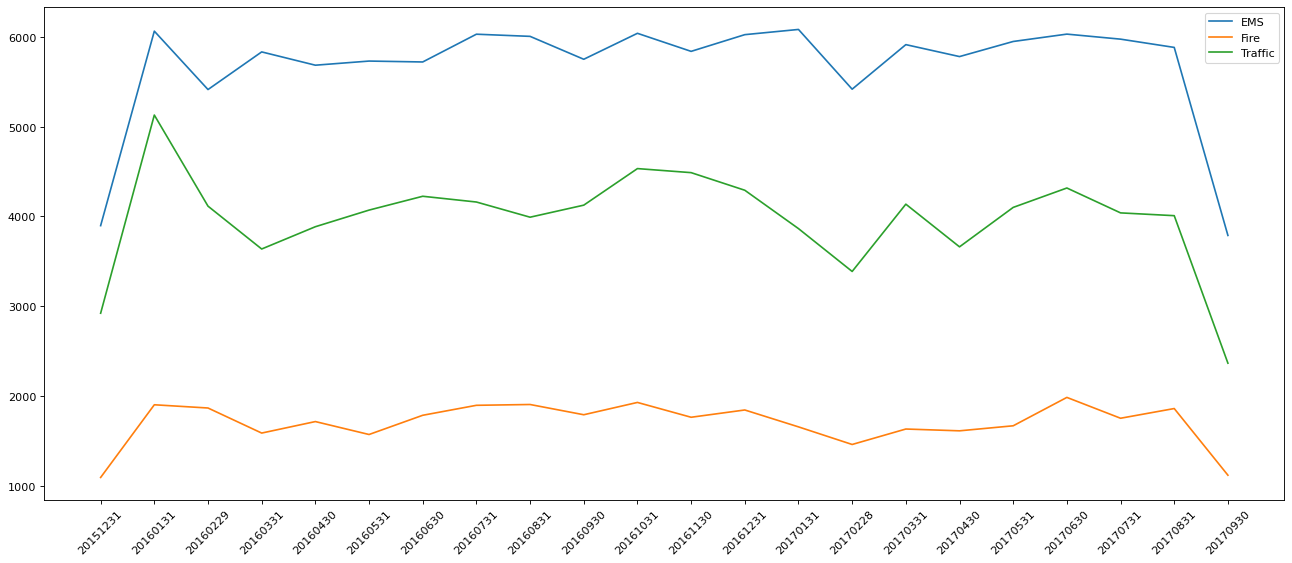

In [36]:
#实战美国911数据
from matplotlib import pyplot as plt

# 把时间字符串转为时间类型设置为索引
df = pd.read_csv("./911.csv")
df["timeStamp"] = pd.to_datetime(df["timeStamp"])

# 添加列，表示分类
temp_list = df["title"].str.split(": ").tolist()
cate_list = [i[0] for i in temp_list] #i[0]就是EMS  Fire  Traffic
# print(cate_list)
# print(np.array(cate_list).reshape((df.shape[0], 1)))
df["cate"] = pd.DataFrame(np.array(cate_list).reshape((df.shape[0], 1)))  #添加一列

df.set_index("timeStamp", inplace=True)

print(df.head(10))

plt.figure(figsize=(20, 8), dpi=80)

# 分组,一图多线
for group_name, group_data in df.groupby(by="cate"):
    # 对不同的分类都进行绘图
    count_by_month = group_data.resample("M").count()["title"]  #降采样
    print(count_by_month)
    # 画图
    _x = count_by_month.index
    print(_x)
    _y = count_by_month.values

    _x = [i.strftime("%Y%m%d") for i in _x]  #变年月日格式

    plt.plot(_x, _y, label=group_name)

plt.xticks(range(len(_x)), _x, rotation=45)
plt.legend(loc="best")
plt.show()

实战-pm2.5

In [37]:
file_path = "./pm2.5/BeijingPM20100101_20151231.csv"

df = pd.read_csv(file_path)
# print(df.head(10))

# 把分开的时间字符串通过periodIndex的方法转化为pandas的时间类型
period = pd.PeriodIndex(year=df["year"], month=df["month"], day=df["day"],
                        hour=df["hour"], freq="H")
df["datetime"] = period
print(df.head(10))


   No  year  month  day  hour  season  PM_Dongsi  PM_Dongsihuan  \
0   1  2010      1    1     0       4        NaN            NaN   
1   2  2010      1    1     1       4        NaN            NaN   
2   3  2010      1    1     2       4        NaN            NaN   
3   4  2010      1    1     3       4        NaN            NaN   
4   5  2010      1    1     4       4        NaN            NaN   
5   6  2010      1    1     5       4        NaN            NaN   
6   7  2010      1    1     6       4        NaN            NaN   
7   8  2010      1    1     7       4        NaN            NaN   
8   9  2010      1    1     8       4        NaN            NaN   
9  10  2010      1    1     9       4        NaN            NaN   

   PM_Nongzhanguan  PM_US Post  DEWP  HUMI    PRES  TEMP cbwd    Iws  \
0              NaN         NaN -21.0  43.0  1021.0 -11.0   NW   1.79   
1              NaN         NaN -21.0  47.0  1020.0 -12.0   NW   4.92   
2              NaN         NaN -21.0  43.0  10

In [38]:
# 把datetime 设置为索引
df.set_index("datetime", inplace=True)

# 进行降采样，进行降采样，行索引必须是pd的时间类型
df = df.resample("7D").mean()
print(df.head())


               No    year     month        day  hour  season  PM_Dongsi  \
datetime                                                                  
2010-01-01   84.5  2010.0  1.000000   4.000000  11.5     4.0        NaN   
2010-01-08  252.5  2010.0  1.000000  11.000000  11.5     4.0        NaN   
2010-01-15  420.5  2010.0  1.000000  18.000000  11.5     4.0        NaN   
2010-01-22  588.5  2010.0  1.000000  25.000000  11.5     4.0        NaN   
2010-01-29  756.5  2010.0  1.571429  14.285714  11.5     4.0        NaN   

            PM_Dongsihuan  PM_Nongzhanguan  PM_US Post       DEWP       HUMI  \
datetime                                                                       
2010-01-01            NaN              NaN   71.627586 -18.255952  54.395833   
2010-01-08            NaN              NaN   69.910714 -19.035714  49.386905   
2010-01-15            NaN              NaN  163.654762 -12.630952  57.755952   
2010-01-22            NaN              NaN   68.069307 -17.404762  34.0952

/tmp/ipykernel_9509/275630654.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.resample("7D").mean()


In [39]:
df.iloc[312]

No                 52500.500000
year                2015.000000
month                 12.000000
day                   28.000000
hour                  11.500000
season                 4.000000
PM_Dongsi            206.271084
PM_Dongsihuan        219.377358
PM_Nongzhanguan      199.566265
PM_US Post           209.244048
DEWP                  -8.559524
HUMI                  70.136905
PRES                1029.934524
TEMP                  -3.202381
Iws                    8.713750
precipitation          0.000000
Iprec                  0.000000
Name: 2015-12-25, dtype: float64

datetime
2013-01-11     65.333333
2013-01-18    161.054217
2013-01-25    224.006098
2013-02-01     61.145570
2013-02-08    110.478788
                 ...    
2014-11-07     51.617284
2014-11-14    149.935065
2014-11-21    142.590062
2014-11-28     82.012346
2014-12-05    105.767857
Freq: 7D, Name: PM_Nongzhanguan, Length: 100, dtype: float64
155 155


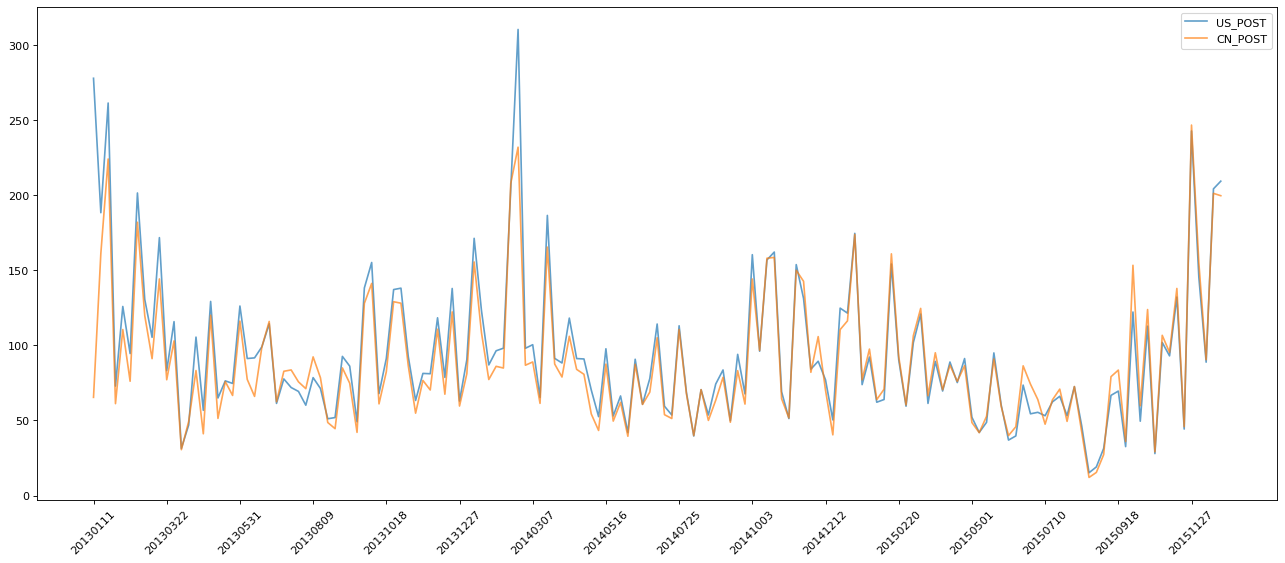

In [40]:
#对比农展馆和美国测试的数据
df= df.loc[:,["PM_US Post","PM_Nongzhanguan"]]
df=df.dropna()  #任何一个为空，整个样本去掉
data=df.loc[:,"PM_US Post"]
data_china = df.loc[:,"PM_Nongzhanguan"]



print(data_china.head(100))
# 画图
_x = data.index
_x = [i.strftime("%Y%m%d") for i in _x]
_x_china = [i.strftime("%Y%m%d") for i in data_china.index]
print(len(_x), len(_x_china))
_y = data.values  #美国的
_y_china = data_china.values

plt.figure(figsize=(20, 8), dpi=80)

plt.plot(range(len(_x)), _y, label="US_POST", alpha=0.7)
plt.plot(range(len(_x_china)), _y_china, label="CN_POST", alpha=0.7)

plt.xticks(range(0, len(_x_china), 10), list(_x_china)[::10], rotation=45)

plt.legend(loc="best")

plt.show()

### 分组运算

In [41]:
dict_obj = {'key1' : ['a', 'b', 'a', 'b', 
                      'a', 'b', 'a', 'a'],
            'key2' : ['one', 'one', 'two', 'three',
                      'two', 'two', 'one', 'three'],
            'data1': np.random.randint(1, 10, 8),
            'data2': np.random.randint(1, 10, 8)}
df_obj = pd.DataFrame(dict_obj)
print(df_obj)

# 按key1分组后，计算data1，data2的统计信息并附加到原始表格中，并添加表头前缀
k1_sum = df_obj.groupby('key1').sum().add_prefix('sum_')
print(k1_sum)

  key1   key2  data1  data2
0    a    one      9      7
1    b    one      5      1
2    a    two      6      4
3    b  three      4      7
4    a    two      3      1
5    b    two      4      3
6    a    one      4      8
7    a  three      6      8
      sum_data1  sum_data2
key1                      
a            28         28
b            13         11


/tmp/ipykernel_9509/1855631801.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  k1_sum = df_obj.groupby('key1').sum().add_prefix('sum_')


In [42]:
df_obj

,key1,key2,data1,data2
0,a,one,9,7
1,b,one,5,1
2,a,two,6,4
3,b,three,4,7
4,a,two,3,1
5,b,two,4,3
6,a,one,4,8
7,a,three,6,8


In [43]:
k1_sum

,sum_data1,sum_data2
key1,,
a,28,28
b,13,11


In [44]:
# 两个df之间进行连接
#和mysql的join是一致的，on 连接条件
k1_sum_merge = pd.merge(df_obj, k1_sum, left_on='key1', right_index=True)
k1_sum_merge

,key1,key2,data1,data2,sum_data1,sum_data2
0,a,one,9,7,28,28
2,a,two,6,4,28,28
4,a,two,3,1,28,28
6,a,one,4,8,28,28
7,a,three,6,8,28,28
1,b,one,5,1,13,11
3,b,three,4,7,13,11
5,b,two,4,3,13,11


In [45]:
# 方法2，使用transform
k1_sum_tf = df_obj.groupby('key1').transform(np.sum).add_prefix('sum_')
k1_sum_tf
# df_obj[k1_sum_tf.columns] = k1_sum_tf
# print(df_obj)

/tmp/ipykernel_9509/2115849092.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  k1_sum_tf = df_obj.groupby('key1').transform(np.sum).add_prefix('sum_')


,sum_data1,sum_data2
0,28,28
1,13,11
2,28,28
3,13,11
4,28,28
5,13,11
6,28,28
7,28,28


In [46]:
df_obj.groupby('key1').mean()

/tmp/ipykernel_9509/425568018.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_obj.groupby('key1').mean()


,data1,data2
key1,,
a,5.600000,5.600000
b,4.333333,3.666667


In [47]:
df_obj

,key1,key2,data1,data2
0,a,one,9,7
1,b,one,5,1
2,a,two,6,4
3,b,three,4,7
4,a,two,3,1
5,b,two,4,3
6,a,one,4,8
7,a,three,6,8


In [48]:
df_obj.groupby('key1').transform(np.mean)

/tmp/ipykernel_9509/2605371891.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_obj.groupby('key1').transform(np.mean)


,data1,data2
0,5.600000,5.600000
1,4.333333,3.666667
2,5.600000,5.600000
3,4.333333,3.666667
4,5.600000,5.600000
5,4.333333,3.666667
6,5.600000,5.600000
7,5.600000,5.600000


In [49]:
def diff_mean(s):
    """
        返回数据与均值的差值
    """
    return s - s.mean()

print(df_obj.groupby('key1').transform(diff_mean))

      data1     data2
0  3.400000  1.400000
1  0.666667 -2.666667
2  0.400000 -1.600000
3 -0.333333  3.333333
4 -2.600000 -4.600000
5 -0.333333 -0.666667
6 -1.600000  2.400000
7  0.400000  2.400000


/tmp/ipykernel_9509/307358676.py:7: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  print(df_obj.groupby('key1').transform(diff_mean))


# 星际争霸

In [50]:
dataset_path = './starcraft.csv'
df_data = pd.read_csv(dataset_path, usecols=['LeagueIndex', 'Age', 'HoursPerWeek', 
                                             'TotalHours', 'APM'])
df_data

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM
0,5,27.0,10.0,3000.0,143.7180
1,5,23.0,10.0,5000.0,129.2322
2,4,30.0,10.0,200.0,69.9612
3,3,19.0,20.0,400.0,107.6016
4,3,32.0,10.0,500.0,122.8908
...,...,...,...,...,...
3390,8,NaN,NaN,NaN,259.6296
3391,8,NaN,NaN,NaN,314.6700
3392,8,NaN,NaN,NaN,299.4282
3393,8,NaN,NaN,NaN,375.8664


In [51]:
def top_n(df, n=3, column='APM'):
    """
        返回每个分组按 column 的 top n 数据
    """
    return df.sort_values(by=column, ascending=False)[:n]

print(df_data.groupby('LeagueIndex').apply(top_n))

                  LeagueIndex   Age  HoursPerWeek  TotalHours       APM
LeagueIndex                                                            
1           2214            1  20.0          12.0       730.0  172.9530
            2246            1  27.0           8.0       250.0  141.6282
            1753            1  20.0          28.0       100.0  139.6362
2           3062            2  20.0           6.0       100.0  179.6250
            3229            2  16.0          24.0       110.0  156.7380
            1520            2  29.0           6.0       250.0  151.6470
3           1557            3  22.0           6.0       200.0  226.6554
            484             3  19.0          42.0       450.0  220.0692
            2883            3  16.0           8.0       800.0  208.9500
4           2688            4  26.0          24.0       990.0  249.0210
            1759            4  16.0           6.0        75.0  229.9122
            2637            4  23.0          24.0       650.0  2

In [52]:
# apply函数接收的参数会传入自定义的函数中
df_data.groupby('LeagueIndex').apply(top_n, n=2, column='Age')

LeagueIndex   Age  HoursPerWeek  TotalHours       APM
LeagueIndex                                                            
1           3146            1  40.0          12.0       150.0   38.5590
            3040            1  39.0          10.0       500.0   29.8764
2           920             2  43.0          10.0       730.0   86.0586
            2437            2  41.0           4.0       200.0   54.2166
3           1258            3  41.0          14.0       800.0   77.6472
            2972            3  40.0          10.0       500.0   60.5970
4           1696            4  44.0           6.0       500.0   89.5266
            1729            4  39.0           8.0       500.0   86.7246
5           202             5  37.0          14.0       800.0  327.7218
            2745            5  37.0          18.0      1000.0  123.4098
6           3069            6  31.0           8.0       800.0  133.1790
            2706            6  31.0           8.0       700.0   66.9918
7           2813            7  26.0          36.0      1300.0  188.5512
            1992            7  26.0          24.0      1000.0  219.6690
8           3340            8   NaN           NaN         NaN  189.7404
            3341            8   NaN           NaN         NaN  287.8128

In [53]:
# group_keys 为 False 时，被 groupby 的列不会变为索引
print(df_data.groupby('LeagueIndex', group_keys=False).apply(top_n))

      LeagueIndex   Age  HoursPerWeek  TotalHours       APM
2214            1  20.0          12.0       730.0  172.9530
2246            1  27.0           8.0       250.0  141.6282
1753            1  20.0          28.0       100.0  139.6362
3062            2  20.0           6.0       100.0  179.6250
3229            2  16.0          24.0       110.0  156.7380
1520            2  29.0           6.0       250.0  151.6470
1557            3  22.0           6.0       200.0  226.6554
484             3  19.0          42.0       450.0  220.0692
2883            3  16.0           8.0       800.0  208.9500
2688            4  26.0          24.0       990.0  249.0210
1759            4  16.0           6.0        75.0  229.9122
2637            4  23.0          24.0       650.0  227.2272
3277            5  18.0          16.0       950.0  372.6426
93              5  17.0          36.0       720.0  335.4990
202             5  37.0          14.0       800.0  327.7218
734             6  16.0          28.0   

# 数据清洗

数据清洗是数据分析关键的一步，直接影响之后的处理工作
- 数据需要修改吗？有什么需要修改的吗？数据应该怎么调整才能适用于接下来的分析和挖掘？
- 是一个迭代的过程，实际项目中可能需要不止一次地执行这些清洗操作
- 处理缺失数据：``pd.fillna()``，``pd.dropna()``

数据连接(pd.merge)
- pd.merge
- 根据单个或多个键将不同 DataFrame 的行连接起来
- 类似数据库的连接操作

In [54]:
import pandas as pd
import numpy as np

df_obj1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                        'data1' : np.random.randint(0,10,7)})
df_obj2 = pd.DataFrame({'key': ['a', 'b' ,'d'],
                        'data2' : np.random.randint(0,10,3)})

print(df_obj1)
print('-'*50)
print(df_obj2)

  key  data1
0   b      6
1   b      4
2   a      4
3   c      1
4   a      5
5   a      3
6   b      9
--------------------------------------------------
  key  data2
0   a      5
1   b      1
2   d      0


In [55]:
# 默认连接使用相同的列名，连接方式是内连接
pd.merge(df_obj1, df_obj2)

,key,data1,data2
0,b,6,1
1,b,4,1
2,b,9,1
3,a,4,5
4,a,5,5
5,a,3,5


In [56]:
# 左表、右表都拿索引连接
pd.merge(df_obj1, df_obj2,left_index=True,right_index=True)

,key_x,data1,key_y,data2
0,b,6,a,5
1,b,4,b,1
2,a,4,d,0


In [57]:
# 左右都拿 'key' 列连接
pd.merge(df_obj1, df_obj2, on='key')

,key,data1,data2
0,b,6,1
1,b,4,1
2,b,9,1
3,a,4,5
4,a,5,5
5,a,3,5


In [58]:
# 更改列名
df_obj1 = df_obj1.rename(columns={'key':'key1'})
df_obj2 = df_obj2.rename(columns={'key':'key2'})

In [59]:
df_obj1

,key1,data1
0,b,6
1,b,4
2,a,4
3,c,1
4,a,5
5,a,3
6,b,9


In [60]:
df_obj2

,key2,data2
0,a,5
1,b,1
2,d,0


In [61]:
pd.merge(df_obj1, df_obj2, left_on='key1', right_on='key2')

,key1,data1,key2,data2
0,b,6,b,1
1,b,4,b,1
2,b,9,b,1
3,a,4,a,5
4,a,5,a,5
5,a,3,a,5


In [62]:
pd.merge(df_obj1, df_obj2, left_on='key1', right_on='key2', how='outer')  #全外连接

,key1,data1,key2,data2
0,b,6.0,b,1.0
1,b,4.0,b,1.0
2,b,9.0,b,1.0
3,a,4.0,a,5.0
4,a,5.0,a,5.0
5,a,3.0,a,5.0
6,c,1.0,NaN,NaN
7,NaN,NaN,d,0.0


In [63]:
#left join 等价于 left outer join
pd.merge(df_obj1, df_obj2, left_on='key1', right_on='key2', how='left')

,key1,data1,key2,data2
0,b,6,b,1.0
1,b,4,b,1.0
2,a,4,a,5.0
3,c,1,NaN,NaN
4,a,5,a,5.0
5,a,3,a,5.0
6,b,9,b,1.0


In [64]:
pd.merge(df_obj1, df_obj2, left_on='key1', right_on='key2', how='right')

,key1,data1,key2,data2
0,a,4.0,a,5
1,a,5.0,a,5
2,a,3.0,a,5
3,b,6.0,b,1
4,b,4.0,b,1
5,b,9.0,b,1
6,NaN,NaN,d,0


In [65]:
# 处理重复列名
df_obj1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                        'data' : np.random.randint(0,10,7)})
df_obj2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                        'data' : np.random.randint(0,10,3)})

print(pd.merge(df_obj1, df_obj2, on='key', suffixes=('_left', '_right')))

  key  data_left  data_right
0   b          1           0
1   b          2           0
2   b          9           0
3   a          9           3
4   a          1           3
5   a          1           3


In [66]:
# 按索引连接
df_obj1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                        'data1' : np.random.randint(0,10,7)})
df_obj2 = pd.DataFrame({'data2' : np.random.randint(0,10,3)}, index=['a', 'b', 'd'])

print(df_obj1)
print(df_obj2)

print(pd.merge(df_obj1, df_obj2, left_on='key', right_index=True))

  key  data1
0   b      0
1   b      5
2   a      0
3   c      6
4   a      5
5   a      6
6   b      7
   data2
a      2
b      8
d      0
  key  data1  data2
0   b      0      8
1   b      5      8
6   b      7      8
2   a      0      2
4   a      5      2
5   a      6      2


In [67]:
pd.merge(df_obj2,df_obj1, left_index=True, right_on='key')

,data2,key,data1
2,2,a,0
4,2,a,5
5,2,a,6
0,8,b,0
1,8,b,5
6,8,b,7


# 数据合并(pd.concat)

沿轴方向将多个对象合并到一起。

In [68]:
arr1 = np.random.randint(0, 10, (3, 4))
arr2 = np.random.randint(0, 10, (3, 4))

print(arr1)
print(arr2)

print('-'*30)

print(np.concatenate([arr1, arr2]))
print('-'*30)
print(np.concatenate([arr1, arr2], axis=1))

[[7 8 4 0]
 [8 9 5 0]
 [1 7 6 3]]
[[1 0 1 1]
 [4 7 3 0]
 [1 8 3 0]]
------------------------------
[[7 8 4 0]
 [8 9 5 0]
 [1 7 6 3]
 [1 0 1 1]
 [4 7 3 0]
 [1 8 3 0]]
------------------------------
[[7 8 4 0 1 0 1 1]
 [8 9 5 0 4 7 3 0]
 [1 7 6 3 1 8 3 0]]


In [69]:
# index 没有重复的情况
ser_obj1 = pd.Series(np.random.randint(0, 10, 5), index=range(0,5))
ser_obj2 = pd.Series(np.random.randint(0, 10, 4), index=range(5,9))
ser_obj3 = pd.Series(np.random.randint(0, 10, 3), index=range(9,12))

print(ser_obj1)
print(ser_obj2)
print(ser_obj3)

0    9
1    7
2    5
3    7
4    8
dtype: int64
5    2
6    1
7    5
8    8
dtype: int64
9     4
10    6
11    8
dtype: int64


In [70]:
print(pd.concat([ser_obj1, ser_obj2, ser_obj3]))
print('-'*30)
print(pd.concat([ser_obj1, ser_obj2, ser_obj3], axis=1))

0     9
1     7
2     5
3     7
4     8
5     2
6     1
7     5
8     8
9     4
10    6
11    8
dtype: int64
------------------------------
      0    1    2
0   9.0  NaN  NaN
1   7.0  NaN  NaN
2   5.0  NaN  NaN
3   7.0  NaN  NaN
4   8.0  NaN  NaN
5   NaN  2.0  NaN
6   NaN  1.0  NaN
7   NaN  5.0  NaN
8   NaN  8.0  NaN
9   NaN  NaN  4.0
10  NaN  NaN  6.0
11  NaN  NaN  8.0


### index 有重复的情况

In [71]:
# index 有重复的情况
ser_obj1 = pd.Series(np.random.randint(0, 10, 5), index=range(5))
ser_obj2 = pd.Series(np.random.randint(0, 10, 4), index=range(4))
ser_obj3 = pd.Series(np.random.randint(0, 10, 3), index=range(3))

print(ser_obj1)
print(ser_obj2)
print(ser_obj3)

0    3
1    8
2    1
3    7
4    8
dtype: int64
0    5
1    1
2    1
3    0
dtype: int64
0    5
1    1
2    7
dtype: int64


In [72]:
print(pd.concat([ser_obj1, ser_obj2, ser_obj3]))

0    3
1    8
2    1
3    7
4    8
0    5
1    1
2    1
3    0
0    5
1    1
2    7
dtype: int64


In [73]:
print(pd.concat([ser_obj1, ser_obj2, ser_obj3], axis=1, join='outer'))

   0    1    2
0  3  5.0  5.0
1  8  1.0  1.0
2  1  1.0  7.0
3  7  0.0  NaN
4  8  NaN  NaN


In [74]:
import pandas as pd
import numpy as np
df_obj1 = pd.DataFrame(np.random.randint(0, 10, (3, 2)), index=['a', 'b', 'c'],
                       columns=['A', 'B'])
df_obj2 = pd.DataFrame(np.random.randint(0, 10, (2, 2)), index=['a', 'b'],
                       columns=['A', 'B'])
print(df_obj1)
print(df_obj2)

print(pd.concat([df_obj1, df_obj2]))
print(pd.concat([df_obj1, df_obj2], axis=1))

   A  B
a  3  8
b  1  0
c  0  3
   A  B
a  6  3
b  1  6
   A  B
a  3  8
b  1  0
c  0  3
a  6  3
b  1  6
   A  B    A    B
a  3  8  6.0  3.0
b  1  0  1.0  6.0
c  0  3  NaN  NaN


### 数据重构

In [75]:
df_obj = pd.DataFrame(np.random.randint(0,10, (5,2)), columns=['data1', 'data2'])
print(df_obj)

stacked = df_obj.stack()  #stack内部带的参数level，选择哪一个column变为index
print(stacked)

   data1  data2
0      7      0
1      7      2
2      5      3
3      6      9
4      4      9
0  data1    7
   data2    0
1  data1    7
   data2    2
2  data1    5
   data2    3
3  data1    6
   data2    9
4  data1    4
   data2    9
dtype: int64


In [76]:
# 默认操作内层索引
print(stacked.unstack())

# 通过level指定操作索引的级别
print(stacked.unstack(level=0))

   data1  data2
0      7      0
1      7      2
2      5      3
3      6      9
4      4      9
       0  1  2  3  4
data1  7  7  5  6  4
data2  0  2  3  9  9


In [ ]:
index1 = pd.MultiIndex.from_arrays([['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'c', 'd', 'd', 'd'],
                [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]], names=['cloth', 'size'])

df= pd.DataFrame(np.arange(24).reshape(12,2),index=index1,columns=['data1','data2'])
print(df)
df_s=df.unstack(level=0)  # 把行索引中的一个级别拿到列索引
print(df_s)
print('-'*30)
print(df_s.columns) # 看到 columns 索引变成层级索引
df_s.stack(0)

            data1  data2
cloth size              
a     0         0      1
      1         2      3
      2         4      5
b     0         6      7
      1         8      9
      2        10     11
c     0        12     13
      1        14     15
      2        16     17
d     0        18     19
      1        20     21
      2        22     23
      data1             data2            
cloth     a   b   c   d     a   b   c   d
size                                     
0         0   6  12  18     1   7  13  19
1         2   8  14  20     3   9  15  21
2         4  10  16  22     5  11  17  23
------------------------------
MultiIndex([('data1', 'a'),
            ('data1', 'b'),
            ('data1', 'c'),
            ('data1', 'd'),
            ('data2', 'a'),
            ('data2', 'b'),
            ('data2', 'c'),
            ('data2', 'd')],
           names=[None, 'cloth'])


cloth       a   b   c   d
size                     
0    data1  0   6  12  18
     data2  1   7  13  19
1    data1  2   8  14  20
     data2  3   9  15  21
2    data1  4  10  16  22
     data2  5  11  17  23

 ## 处理重复数据

In [78]:
df_obj = pd.DataFrame({'data1' : ['a'] * 4 + ['b'] * 4,
                       'data2' : np.random.randint(0, 4, 8)})
print(df_obj)

  data1  data2
0     a      0
1     a      2
2     a      2
3     a      1
4     b      3
5     b      2
6     b      0
7     b      0


In [79]:
print(df_obj.duplicated())
df_obj[~df_obj.duplicated()]  #取出不重复行

0    False
1    False
2     True
3    False
4    False
5    False
6    False
7     True
dtype: bool


,data1,data2
0,a,0
1,a,2
3,a,1
4,b,3
5,b,2
6,b,0


In [80]:
print(df_obj.duplicated('data2'))

0    False
1    False
2     True
3    False
4    False
5     True
6     True
7     True
dtype: bool


In [81]:
df_obj1 = pd.DataFrame({'data1' :[np.nan] * 4,
                       'data2' :list('1235')})
df_obj1

,data1,data2
0,NaN,1
1,NaN,2
2,NaN,3
3,NaN,5


In [82]:
df_obj1.duplicated('data1')

0    False
1     True
2     True
3     True
dtype: bool

In [83]:
print(df_obj.drop_duplicates())  #删除重复行
print(df_obj.drop_duplicates('data2'))

  data1  data2
0     a      0
1     a      2
3     a      1
4     b      3
5     b      2
6     b      0
  data1  data2
0     a      0
1     a      2
3     a      1
4     b      3


In [84]:
df_obj

,data1,data2
0,a,0
1,a,2
2,a,2
3,a,1
4,b,3
5,b,2
6,b,0
7,b,0


In [85]:
ser_obj = pd.Series(np.random.randint(0,10,10))  #series 用map
print(ser_obj)

print(ser_obj.map(lambda x : x ** 2))

0    9
1    7
2    8
3    2
4    6
5    8
6    7
7    2
8    6
9    6
dtype: int64
0    81
1    49
2    64
3     4
4    36
5    64
6    49
7     4
8    36
9    36
dtype: int64


In [86]:
ser_obj=pd.Series(np.arange(10))
# 单个值替换单个值
print(ser_obj.replace(1, -100))

# 多个值替换一个值
print(ser_obj.replace(range(6,9), -100))

# 多个值替换多个值
print(ser_obj.replace([4, 7], [-100, -200]))

0      0
1   -100
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
dtype: int64
0      0
1      1
2      2
3      3
4      4
5      5
6   -100
7   -100
8   -100
9      9
dtype: int64
0      0
1      1
2      2
3      3
4   -100
5      5
6      6
7   -200
8      8
9      9
dtype: int64


In [87]:
df = pd.DataFrame({'A': [0, 1, 2, 3, 4],
                   'B': [5, 6, 7, 8, 9],
                   'C': ['a', 'b', 'c', 'd', 'e']})

In [88]:
df

,A,B,C
0,0,5,a
1,1,6,b
2,2,7,c
3,3,8,d
4,4,9,e


In [89]:
df.replace(to_replace=r'^a', value=100, regex=True)

,A,B,C
0,0,5,100
1,1,6,b
2,2,7,c
3,3,8,d
4,4,9,e


In [90]:
df.dtypes

A     int64
B     int64
C    object
dtype: object